In [2]:
import pandas as pd

# Define correct column names
column_names = ["Date", "Open", "High", "Low", "Close", "Volume"]

# Load CSV, skipping first two rows, and setting column names
df = pd.read_csv("../data/bitcoin_prices.csv", skiprows=2, names=column_names)

# Convert "Date" to datetime format
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Drop any rows where "Date" is missing (just in case)
df = df.dropna(subset=["Date"])

# Set "Date" as the index
df.set_index("Date", inplace=True)

# Display dataset info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1502 entries, 2020-01-01 to 2024-02-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1502 non-null   float64
 1   High    1502 non-null   float64
 2   Low     1502 non-null   float64
 3   Close   1502 non-null   float64
 4   Volume  1502 non-null   float64
dtypes: float64(5)
memory usage: 70.4 KB


,Open,High,Low,Close,Volume
Date,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,1.856566e+10
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,2.080208e+10
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,2.811148e+10
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,1.844427e+10
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,1.972507e+10


In [5]:
# Normalize the data (important for ML models)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df["Close_Scaled"] = scaler.fit_transform(df[["Close"]])


In [6]:
# Create a target column that shifts Close_Scaled by 30 days
df["Prediction"] = df["Close_Scaled"].shift(-30)

# Drop the last 30 rows since they have no target values
df.dropna(inplace=True)

# Display the modified dataset
df.tail()


,Open,High,Low,Close,Volume,Close_Scaled,Prediction
Date,,,,,,,
2024-01-07,43943.097656,44495.570312,43662.230469,43998.464844,1.933057e+10,0.623464,0.602023
2024-01-08,46970.503906,47218.000000,43244.082031,43948.707031,4.274619e+10,0.622668,0.608940
2024-01-09,46139.730469,47893.699219,45244.714844,46987.640625,3.982129e+10,0.671255,0.628798
2024-01-10,46627.777344,47647.222656,44483.152344,46121.539062,5.011461e+10,0.657407,0.644231
2024-01-11,46368.585938,48969.371094,45678.644531,46656.074219,4.583373e+10,0.665953,0.673907


In [7]:
from sklearn.model_selection import train_test_split

# Define input (X) and target (y)
X = df[["Close_Scaled"]]  # Input feature
y = df["Prediction"]  # Target variable

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show dataset sizes
print("Training data size:", X_train.shape[0])
print("Testing data size:", X_test.shape[0])


Training data size: 1177
Testing data size: 295


In [8]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Show a few predictions
import numpy as np
print("Actual Prices:", np.array(y_test[:5]))
print("Predicted Prices:", predictions[:5])


Actual Prices: [0.42831646 0.10801749 0.40496174 0.03630966 0.08439105]
Predicted Prices: [0.53043954 0.1103844  0.33935063 0.10728363 0.14587706]


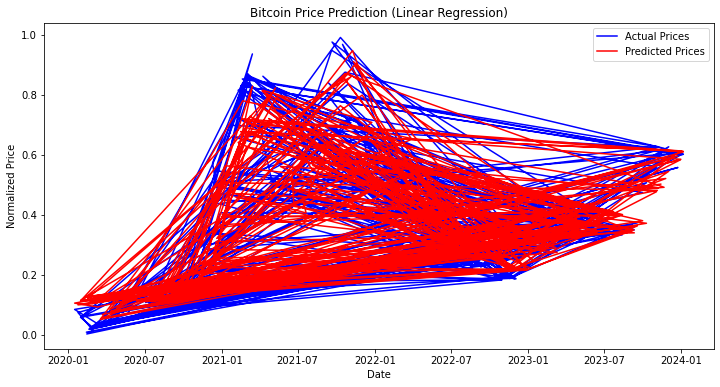

In [9]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Prices", color="blue")
plt.plot(y_test.index, predictions, label="Predicted Prices", color="red")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.title("Bitcoin Price Prediction (Linear Regression)")
plt.show()
